In [32]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train_fe1.csv')
test_df = pd.read_csv('test_fe1.csv')

train_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,BsmtFlag,WoodDeckFlag,PoolFlag,BsmtFinPerc,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,4.189655,9.042040,7,5,2003,5.283204,4,3,4,3,1,6,1,6.753438,5,0.0,7.444833,1,0,2,1,3,1,4,8,7,0,0,2,2,3,2,0.000000,4.127134,0.000000,0.0,0.0,0,1,0,0,0.824766,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.247694
1,1,4.394449,9.169623,6,8,1976,0.000000,3,3,4,3,4,5,1,7.141245,5,0.0,7.141245,0,1,2,0,3,1,3,6,7,1,3,2,2,3,2,5.700444,0.000000,0.000000,0.0,0.0,0,1,1,0,0.774960,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.109011
2,2,4.234107,9.328212,7,5,2002,5.093750,4,3,4,3,2,6,1,6.825460,5,0.0,7.488294,1,0,2,1,3,1,4,6,7,1,3,2,2,3,2,0.000000,3.761200,0.000000,0.0,0.0,0,1,0,0,0.528261,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.317167
3,3,4.110874,9.164401,7,5,1970,0.000000,3,3,3,4,1,5,1,6.629363,4,0.0,7.448916,1,0,1,0,3,1,4,7,7,1,4,1,3,3,2,0.000000,3.583519,5.609472,0.0,0.0,0,1,0,0,0.285714,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11.849398
4,4,4.442651,9.565284,8,5,2000,5.860786,4,3,4,3,3,6,1,7.044033,5,0.0,7.695758,1,0,2,1,4,1,4,9,7,1,3,2,3,3,2,5.262690,4.442651,0.000000,0.0,0.0,0,1,1,0,0.572052,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.429216


In [3]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [4]:
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df.copy()

In [5]:
del train_df, test_df

In [6]:
print(X_train.shape)
print(X_test.shape)

(1460, 212)
(1459, 212)


## Train Valildation Split

In [7]:
# Save the 'MiscVal' column
X_test_MiscVal = X_test['MiscVal']

# Now drop the 'MiscVal' column since we won't use it to train our model.
X_train.drop("MiscVal", axis = 1, inplace = True)
X_test.drop("MiscVal", axis = 1, inplace = True)

In [8]:
# train-test split
from sklearn.model_selection import train_test_split
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [9]:
len(X_train_train)/len(X_val)

4.0

## Ridge Regression

In [10]:
from sklearn import linear_model

Automatically created module for IPython interactive environment


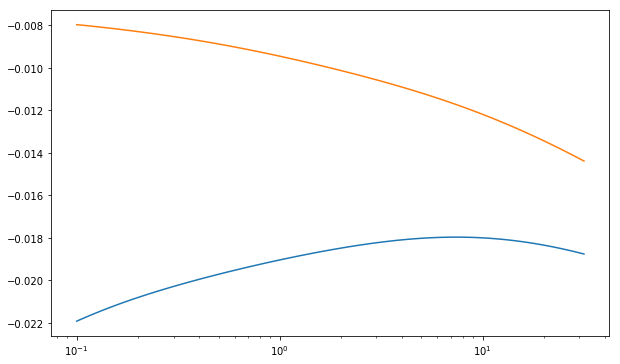

In [11]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train

param_range = np.logspace(-1, 1.5, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [12]:
param_range[np.argmax(test_scores_mean)]

7.3907220335257788

In [13]:
rm_best = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])

In [14]:
rm_best.fit(X_train_train, y_train_train)

Ridge(alpha=7.3907220335257788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [15]:
pred_val = rm_best.predict(X_val)

In [16]:
np.sqrt(np.mean((pred_val - y_val)**2))

0.12066372279592905

In [17]:
rm_best.fit(X_train, y_train)

Ridge(alpha=7.3907220335257788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [18]:
pred_test = rm_best.predict(X_test)

In [19]:
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test) + X_test_MiscVal})

In [20]:
pred_test_final = pred_test_final.assign(Id = test_ID)

In [21]:
pred_test_final.to_csv('rr2_yq.csv',index=False)

In [26]:
type(y_train_train)

pandas.core.series.Series

In [31]:
X_train_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtFlag,WoodDeckFlag,PoolFlag,BsmtFinPerc,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
455,4.394449,9.169623,7,6,1973,5.771441,3,3,3,3,1,5,1,7.125283,2,0.000000,7.125283,0,0,1,1,3,1,3,6,7,1,3,1,2,3,2,0.000000,0.000000,0.000000,0.0,0.000000,1,0,0,0.737520,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
863,4.262680,8.978660,5,5,1959,0.000000,3,3,3,3,1,4,1,7.046647,3,0.000000,7.046647,1,0,1,0,3,1,3,6,7,0,0,1,1,3,2,0.000000,0.000000,0.000000,0.0,0.000000,1,0,0,1.000000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
504,3.218876,7.744570,6,5,1974,0.000000,3,3,3,3,1,5,3,6.752270,3,0.000000,7.187657,0,1,2,1,3,1,3,6,7,1,2,1,2,3,2,5.564520,0.000000,0.000000,0.0,0.000000,1,1,0,0.879532,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1413,4.488636,9.305196,8,5,2006,5.905362,4,3,4,4,1,6,1,7.520235,5,0.000000,7.520235,1,0,2,0,2,1,4,7,7,1,4,3,2,3,2,5.111988,3.806662,0.000000,0.0,0.000000,1,1,0,0.529284,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1389,4.110874,8.699681,6,6,1950,0.000000,3,4,3,4,1,5,1,6.601230,5,0.000000,7.105786,0,1,1,0,3,1,3,6,7,1,4,1,2,3,2,0.000000,0.000000,0.000000,0.0,0.000000,1,0,0,0.510204,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1091,3.218876,7.678326,7,5,2000,5.361292,4,3,4,3,1,4,1,6.398595,5,0.000000,7.133296,1,0,2,1,2,1,4,4,7,0,0,1,2,3,2,0.000000,3.891820,0.000000,0.0,0.000000,1,0,0,0.850000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
590,4.174387,9.026538,7,5,2004,0.000000,4,3,4,3,1,6,1,6.647688,5,0.000000,7.367077,0,0,2,1,3,1,4,6,7,0,0,2,2,3,2,0.000000,3.828641,0.000000,0.0,0.000000,1,0,0,0.636364,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1298,5.749393,11.064887,10,5,2008,6.680855,5,3,5,3,4,6,1,8.717846,5,0.000000,8.638171,2,0,2,1,3,1,5,12,7,3,4,3,2,3,2,5.370638,5.680173,0.000000,0.0,0.000000,1,1,1,0.923732,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1255,3.970292,8.738896,6,6,1950,0.000000,3,3,3,2,1,2,1,6.785588,3,0.000000,7.221105,0,0,1,0,3,1,3,6,7,1,4,1,1,3,2,0.000000,0.000000,0.000000,0.0,4.795791,1,0,0,0.480769,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1

## Lasso Regression

Automatically created module for IPython interactive environment


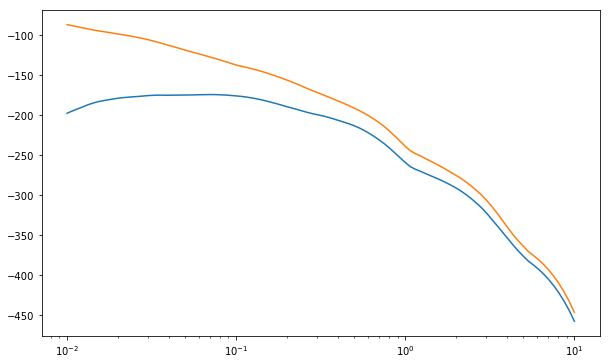

In [29]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train*100

param_range = np.logspace(-2, 1, 100)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [203]:
param_range[np.argmax(test_scores_mean)]

0.070548023107186456

In [204]:
lm_best = linear_model.Lasso(alpha = param_range[np.argmax(test_scores_mean)])

In [205]:
lm_best.fit(X_train_train, y_train_train*100)

Lasso(alpha=0.070548023107186456, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [206]:
lm_best.coef_

array([  0.        ,   7.25981945,   5.89187671,   3.10544471,
         0.08415836,   0.        ,   1.46960993,  -0.79141202,
         1.66112864,  -0.10870268,   2.03562812,   0.58874111,
        -0.        ,   0.        ,   1.30602108,  -1.14459216,
        38.7166892 ,   2.44599004,   0.        ,   3.27038544,
         2.2857907 ,  -0.26882933,  -2.29602547,   2.67639862,
         0.75501239,   3.30064008,   0.82967404,   0.71724474,
         0.32585818,   5.33937398,  -0.        ,   1.96368176,
         0.20202346,   0.1785686 ,  -0.05927298,   0.56401273,
         0.9732695 ,  -0.        ,  -0.        ,  -0.        ,
         6.06708175,   0.        ,  -2.32833665,  -0.        ,
        -0.        ,   3.30500697,  -0.84056209,  -0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         4.27866729,   0.        ,   2.56103925,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [207]:
pred_val = lm_best.predict(X_val)

In [208]:
np.sqrt(np.mean((pred_val/100 - y_val)**2))

0.12075029845852028

In [209]:
lm_best.fit(X_train, y_train*100)

Lasso(alpha=0.070548023107186456, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [188]:
pred_test = lm_best.predict(X_test)

In [189]:
pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test/100) + X_test_MiscVal})

In [190]:
pred_test_final = pred_test_final.assign(Id = test_ID)

In [191]:
pred_test_final.to_csv('lr1_yq.csv',index=False)

## Random Forest